In [46]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as py

Get Data from Google Datasource

In [47]:
spy = web.DataReader('SPY',data_source='google')

In [48]:
type(spy)

pandas.core.frame.DataFrame

In [49]:
spy.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2017-03-20,237.03,237.36,236.32,236.77,52536979
2017-03-21,237.47,237.61,233.58,233.73,131809275
2017-03-22,233.77,234.61,233.05,234.28,97569204
2017-03-23,234.00,235.34,233.60,234.03,100410277
2017-03-24,234.38,235.04,232.96,233.86,112504853
2017-03-27,231.93,233.92,231.61,233.62,87454452
2017-03-28,233.27,235.81,233.14,235.32,93483915
2017-03-29,234.99,235.81,234.72,235.54,61950354
2017-03-30,235.47,236.52,235.27,236.29,56737890


calculate volatilities, add a new column to the goog dataframe
Standard deviation is simply defined as the square root of the average squared deviation of the data from its mean.

Calculate returns. The return of a stock in a given period can be defined as the natural log, ln, of the closing price of a stock at the end of the period divided by the closing price of the stock at the end of the previous period. In equation form, this is: Rn=ln(Cn/(C(n-1)), where Rn is the return of a given stock over the period, ln is the natural log function, Cn is the closing price at the end of the period, and C(n-1) is the closing price at the end of the last period.[5]

Calculate the volatility. The volatility is calculated as the square root of the variance, S. This can be calculated as V=sqrt(S). This "square root" measures the deviation of a set of returns (perhaps daily, weekly or monthly returns) from their mean. It is also called the Root Mean Square, or RMS, of the deviations from the mean return. It is also called the standard deviation of the returns.[10]

In [50]:
spy['logreturns'] = np.log(goog.Close/goog.Close.shift(1))
spy['vol'] = pd.rolling_std(goog.logreturns,window=252)*np.sqrt(252)

C:\Users\vinayaks\AppData\Local\Continuum\Miniconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  from ipykernel import kernelapp as app


In [51]:
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D518390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA60048>], dtype=object)

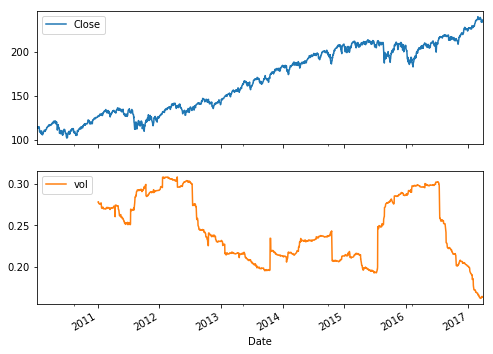

In [52]:
spy[['Close','vol']].plot(subplots=True,figsize=(8,6))

In [66]:
sp5 = web.DataReader('SPY',data_source='yahoo',start='1/1/2000',end='4/1/2017')

In [67]:
sp5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4339 entries, 2000-01-03 to 2017-03-31
Data columns (total 6 columns):
Open         4339 non-null float64
High         4339 non-null float64
Low          4339 non-null float64
Close        4339 non-null float64
Volume       4339 non-null int64
Adj Close    4339 non-null float64
dtypes: float64(5), int64(1)
memory usage: 237.3 KB


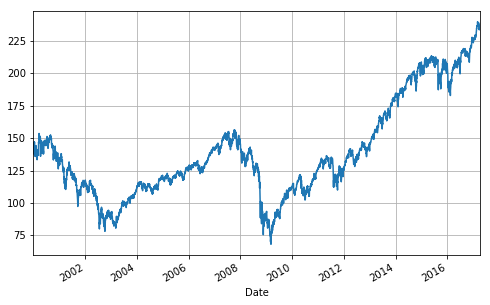

In [68]:
sp5.Close.plot(grid=True,figsize=(8,5))

In [74]:
sp5['d45'] = np.round(pd.rolling_mean(sp5.Close,window=45),2)
sp5['y1']  = np.round(pd.rolling_mean(sp5.Close,window=252),2)
sp5[['Close','d45','y1']]

C:\Users\vinayaks\AppData\Local\Continuum\Miniconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=45,center=False).mean()
  if __name__ == '__main__':
C:\Users\vinayaks\AppData\Local\Continuum\Miniconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).mean()
  from ipykernel import kernelapp as app


,Close,d45,y1
Date,,,
2000-01-03,145.437500,NaN,NaN
2000-01-04,139.750000,NaN,NaN
2000-01-05,140.000000,NaN,NaN
2000-01-06,137.750000,NaN,NaN
2000-01-07,145.750000,NaN,NaN
2000-01-10,146.250000,NaN,NaN
2000-01-11,144.500000,NaN,NaN
2000-01-12,143.062500,NaN,NaN
2000-01-13,145.000000,NaN,NaN


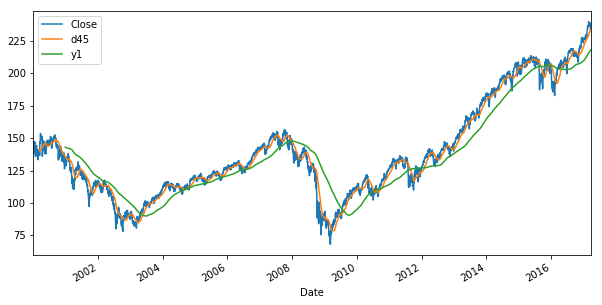

In [75]:
sp5[['Close','d45','y1']].plot(figsize=(10,5))

In [89]:
sp5['d45MinusY1'] = sp5.d45 - sp5.y1
sp5.d45MinusY1.describe()

count    4088.000000
mean        1.957099
std        10.147279
min       -34.960000
25%              NaN
50%              NaN
75%              NaN
max        15.880000
Name: d45MinusY1, dtype: float64

In [93]:
SignalThreshold = 5
#buy signal is 42d trend is for the first time 5 points above 252 day trend
sp5['signal'] = np.where(sp5.d45MinusY1 > SignalThreshold, 1, 0)
#Sell signal if for the first time SD points below 252 day trend
sp5['signal'] = np.where(sp5.d45MinusY1 < -SignalThreshold, -1, sp5['signal'])
sp5.signal.value_counts()

 1    1982
 0    1405
-1     952
Name: signal, dtype: int64

(-1.1, 1.1)

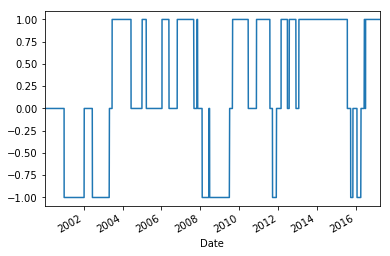

In [94]:
sp5.signal.plot(lw=1.5)
plt.ylim([-1.1,1.1])

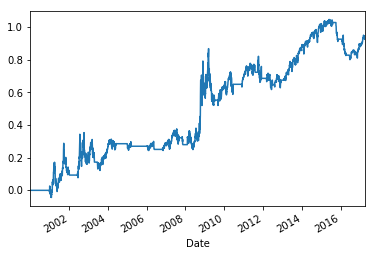

In [100]:
r = sp5.Close.pct_change().shift(2) * sp5.signal
p = r.cumsum()
p.plot()


In [101]:
sp5['Market'] = np.log(sp5.Close/sp5.Close.shift(1))

In [102]:
sp5.Close.pct_change().head()

,Open,High,Low,Close,Volume,Adj Close,45d,1y,d45,y1,d45-y,d45MinusY1,signal,Market
Date,,,,,,,,,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,8164300,105.366938,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2000-01-04,143.531204,144.062500,139.640594,139.750000,8089800,101.246443,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.039891
2000-01-05,139.937500,141.531204,137.250000,140.000000,12177900,101.427563,NaN,NaN,NaN,NaN,NaN,NaN,0,0.001787
2000-01-06,139.625000,141.500000,137.750000,137.750000,6227200,99.797478,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.016202
2000-01-07,140.312500,145.750000,140.062500,145.750000,8066500,105.593338,NaN,NaN,NaN,NaN,NaN,NaN,0,0.056452
2000-01-10,146.250000,146.906204,145.031204,146.250000,5741700,105.955580,NaN,NaN,NaN,NaN,NaN,NaN,0,0.003425
2000-01-11,145.812500,146.093704,143.500000,144.500000,7503700,104.687735,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.012038
2000-01-12,144.593704,144.593704,142.875000,143.062500,6907700,103.646291,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.009998
2000-01-13,144.468704,145.750000,143.281204,145.000000,5158300,105.049976,NaN,NaN,NaN,NaN,NaN,NaN,0,0.013452


In [103]:
sp5.Close.pct_change().head()

Date
2000-01-03         NaN
2000-01-04   -0.039106
2000-01-05    0.001789
2000-01-06   -0.016071
2000-01-07    0.058076
Name: Close, dtype: float64

In [104]:
sp5['Strategy'] = sp5.signal.shift(1) * sp5.Market

In [110]:
sp5[sp5.signal == 1]

,Open,High,Low,Close,Volume,Adj Close,45d,1y,d45,y1,d45-y,d45MinusY1,signal,Market,Strategy
Date,,,,,,,,,,,,,,,
2003-06-19,101.639999,101.730003,99.839996,100.019997,43551700,75.640769,95.08,89.96,95.08,89.96,5.12,5.12,1,-0.015378,-0.000000
2003-06-20,100.389999,100.500000,99.419998,99.440002,41545000,75.473800,95.33,89.96,95.33,89.96,5.37,5.37,1,-0.005816,-0.005816
2003-06-23,99.449997,99.660004,97.919998,98.419998,34237500,74.699629,95.53,89.95,95.53,89.95,5.58,5.58,1,-0.010310,-0.010310
2003-06-24,98.220001,99.089996,98.019997,98.519997,36213600,74.775527,95.72,89.95,95.72,89.95,5.77,5.77,1,0.001016,0.001016
2003-06-25,98.529999,99.440002,97.529999,97.529999,47743400,74.024130,95.86,89.95,95.86,89.95,5.91,5.91,1,-0.010100,-0.010100
2003-06-26,97.779999,98.980003,96.959999,98.800003,33477300,74.988048,96.01,89.95,96.01,89.95,6.06,6.06,1,0.012938,0.012938
2003-06-27,98.750000,99.190002,97.580002,97.660004,54208800,74.122802,96.15,89.94,96.15,89.94,6.21,6.21,1,-0.011606,-0.011606
2003-06-30,98.220001,98.669998,97.470001,97.629997,33349000,74.100028,96.31,89.94,96.31,89.94,6.37,6.37,1,-0.000307,-0.000307
2003-07-01,97.250000,98.849998,96.430000,98.529999,51322800,74.783118,96.46,89.94,96.46,89.94,6.52,6.52,1,0.009176,0.009176


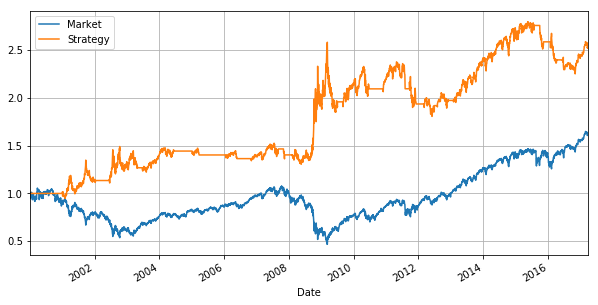

In [115]:
sp5[['Market','Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(10,5))

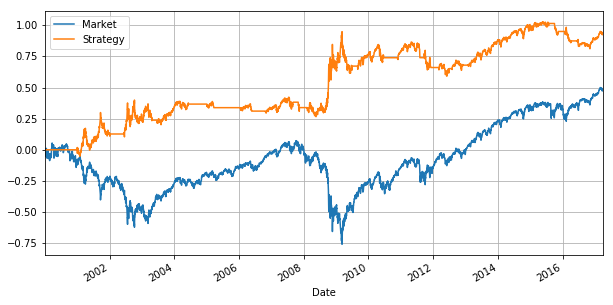

In [116]:
sp5[['Market','Strategy']].cumsum().plot(grid=True,figsize=(10,5))